 第6章: 単語ベクトル
 単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して、以下の処理を行うプログラムを作成せよ。

 50. 単語ベクトルの読み込みと表示
 Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル(edit.html)（300万単語・フレーズ、300次元）をダウンロードし、”United States”の単語ベクトルを表示せよ。ただし、”United States”は内部的には”United_States”と表現されていることに注意せよ。



In [6]:
!{sys.executable} -m pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 53.5 MB/s eta 0:00:00


In [7]:
import sys
import gensim.downloader as api
model = api.load("word2vec-google-news-300")
print(model["United_States"])

[==================================================] 100.0% 1662.8/1662.8MB downloaded
[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2

51. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ。

model.similarity は 2 つのベクトル間のコサイン類似度を計算する関数である。


In [6]:
model.similarity("United_States", "U.S.")

np.float32(0.73107743)

52. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と、その類似度を出力せよ。








model.most_similar(...) は、コサイン類似度を用いて、指定した単語とコサイン類似度が高い（最も意味的に近い）単語を検索する。
topn = top number

In [7]:
similar_words = model.most_similar("United_States", topn=10)
for word, similarity in similar_words:
    print(word, similarity)

Unites_States 0.7877248525619507
Untied_States 0.7541370987892151
United_Sates 0.7400724291801453
U.S. 0.7310774326324463
theUnited_States 0.6404393911361694
America 0.6178410053253174
UnitedStates 0.6167312264442444
Europe 0.6132988929748535
countries 0.6044804453849792
Canada 0.601906955242157


53. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き、”Athens”のベクトルを足したベクトルを計算し、そのベクトルと類似度の高い10語とその類似度を出力せよ。


这行代码是在让模型计算：
“Spain : Madrid = Greece : ？”
也就是：用“Spain 和 Athens”，减去 “Madrid”，来推理“另一个国家的首都”是谁。

换成更直观的中文：

👉 “马德里是西班牙的首都，那么雅典是哪个国家的首都？”

positive=["Spain", "Athens"]

意思是： 这些单词的向量是 “要加进去的（+）”

negative=["Madrid"]

意思是： 这个单词的向量是 “要减掉的（−）”

In [8]:
model.most_similar(positive=["Spain", "Athens"], negative=["Madrid"], topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862097740173),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]

54. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし、国と首都に関する事例（: capital-common-countriesセクション）に対して、vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し、そのベクトルと類似度が最も高い単語と、その類似度を求めよ。求めた単語と類似度は、各事例と一緒に記録せよ.



In [14]:
import pandas as pd
import gensim.downloader as api
model = api.load("glove-wiki-gigaword-100")

from google.colab import drive
drive.mount('/content/drive')

questions = []

with open("/content/drive/MyDrive/Colab Notebooks/chapter6/questions-words.txt", encoding="utf-8") as f:
    section = None
    for line in f:
        line = line.strip()
        if line.startswith(":"):
            section = line
            continue
        if section == ": capital-common-countries":
            a, b, c, d = line.split()
            questions.append((a, b, c, d))

results = []

for a, b, c, d in questions:
    a1, b1, c1 = a.lower(), b.lower(), c.lower()

    if a1 in model and b1 in model and c1 in model:
        vec = model[b1] - model[a1] + model[c1]
        pred, sim = model.similar_by_vector(vec, topn=1)[0]

        pred_out = pred.capitalize()
        results.append([a, b, c, d, pred_out, sim])


for row in results:
    a, b, c, d_true, d_pred, sim = row

best = max(results, key=lambda x: x[5])

a, b, c, d_true, d_pred, sim = best
print("類似度が最も高い単語：")
print(f"{a} : {b} = {c} : {d_pred} | similarity = {sim:.4f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
類似度が最も高い単語：
Kabul : Afghanistan = Tehran : Iran | similarity = 0.9328


55. アナロジータスクでの正解率
54の実行結果を用い、意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ。


In [17]:
import pandas as pd
import gensim.downloader as api
model = api.load("glove-wiki-gigaword-100")

from google.colab import drive
drive.mount('/content/drive')

questions = []

semantic_correct = 0
semantic_total = 0

syntactic_correct = 0
syntactic_total = 0

current_section = None

with open("/content/drive/MyDrive/Colab Notebooks/chapter6/questions-words.txt", encoding="utf-8") as f:
    for line in f:
        line = line.strip()

        if line.startswith(":"):
            current_section = line
            continue

        a, b, c, d_true = line.split()
        a1, b1, c1, d1 = a.lower(), b.lower(), c.lower(), d_true.lower()

        if a1 not in model or b1 not in model or c1 not in model:
            continue

        vec = model[b1] - model[a1] + model[c1]
        d_pred, _ = model.similar_by_vector(vec, topn=1)[0]

        if not current_section.startswith(": gram"):
            semantic_total += 1
            if d_pred == d1:
                semantic_correct += 1
        else:
            syntactic_total += 1
            if d_pred == d1:
                syntactic_correct += 1

semantic_acc = semantic_correct / semantic_total
syntactic_acc = syntactic_correct / syntactic_total

print("意味的アナロジー（semantic analogy） =", round(semantic_acc, 4))
print("文法的アナロジー（syntactic analogy） =", round(syntactic_acc, 4))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
意味的アナロジー（semantic analogy） = 0.4431
文法的アナロジー（syntactic analogy） = 0.2731


56. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし、単語ベクトルにより計算される類似度のランキングと、人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ。



In [13]:
import pandas as pd
import gensim.downloader as api
model = api.load("glove-wiki-gigaword-100")

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

data = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/chapter6/wordsim353/combined.csv",
    header=None
)

data.columns = ["word1", "word2", "human_score"]
data.head()

import numpy as np

def cosine_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

model_scores = []
human_scores = []

for _, row in data.iterrows():
    w1, w2, h = row["word1"], row["word2"], row["human_score"]

    w1 = str(w1).lower()
    w2 = str(w2).lower()

    if w1 in model and w2 in model:
        sim = cosine_sim(model[w1], model[w2])
        model_scores.append(sim)
        human_scores.append(h)
from scipy.stats import spearmanr

rho, p_value = spearmanr(model_scores, human_scores)

print("Spearman ρ =", rho)
print("p-value    =", p_value)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Spearman ρ = 0.5179494116015757
p-value    = 1.2729354061013428e-25


57. k-meansクラスタリング
国名に関する単語ベクトルを抽出し、k-meansクラスタリングをクラスタ数k=5として実行せよ。



In [11]:
import gensim.downloader as api
from google.colab import drive
import numpy as np
from sklearn.cluster import KMeans
from collections import defaultdict

drive.mount('/content/drive')

country_file = "/content/drive/MyDrive/Colab Notebooks/chapter6/questions-words.txt"
model = api.load("glove-wiki-gigaword-100")

unique_countries = set()
current_section = None

with open(country_file, encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if line.startswith(":"):
            current_section = line
            continue

        if current_section == ": capital-common-countries":
            parts = line.split()
            if len(parts) == 4:
                unique_countries.add(parts[1].lower())
                unique_countries.add(parts[3].lower())

countries_list = sorted(list(unique_countries))

country_vectors = []
valid_countries = []

for c in countries_list:
    if c in model:
        country_vectors.append(model[c])
        valid_countries.append(c)

country_vectors = np.array(country_vectors)

k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(country_vectors)

clusters = defaultdict(list)

for country, label in zip(valid_countries, labels):
    clusters[label].append(country)

for i in range(k):
    print(f"\n Cluster {i+1}")
    for c in clusters[i]:
        print(" ", c)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

 Cluster 1
  finland
  germany
  norway
  sweden
  switzerland

 Cluster 2
  afghanistan
  egypt
  iran
  iraq
  pakistan

 Cluster 3
  australia
  canada
  england

 Cluster 4
  china
  cuba
  japan
  thailand
  vietnam

 Cluster 5
  france
  greece
  italy
  russia
  spain


## 58. Ward法によるクラスタリング

###
国名に関する単語ベクトルに対し、Ward法による階層型クラスタリングを実行し、クラスタリング結果をデンドログラムとして可視化する。


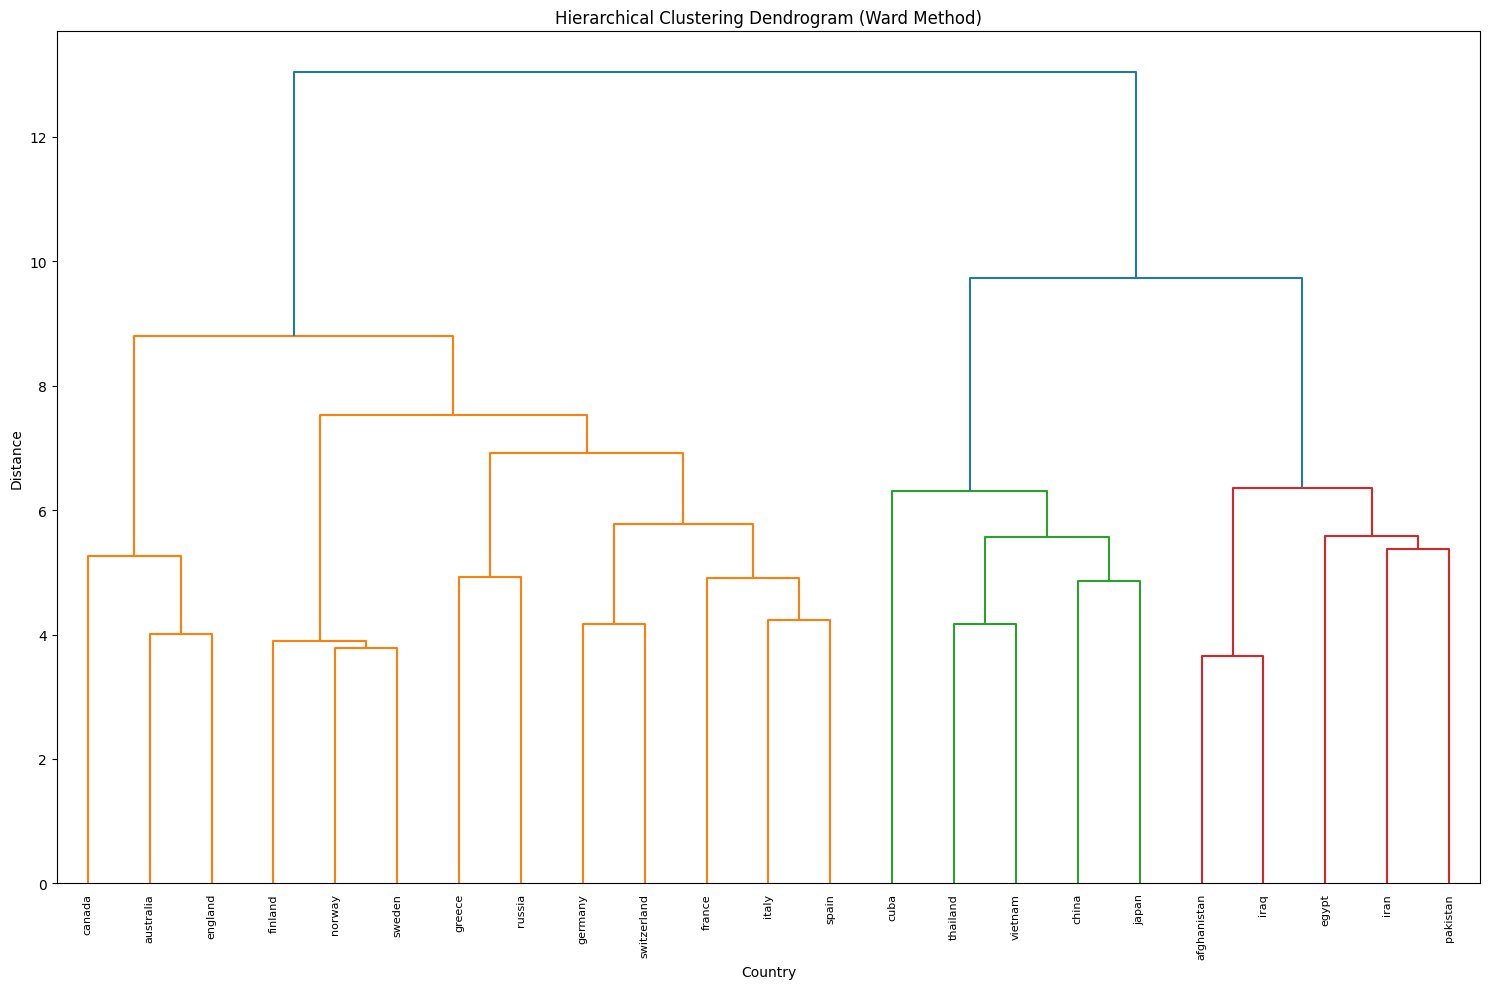

In [14]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

linked = linkage(country_vectors, method='ward')

plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram (Ward Method)')
plt.xlabel('Country')
plt.ylabel('Distance')
dendrogram(
    linked,
    labels=valid_countries,
    leaf_rotation=90.,
    leaf_font_size=8.,
)

plt.tight_layout()
plt.show()

## 59. t-SNEによる可視化

###
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ。


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


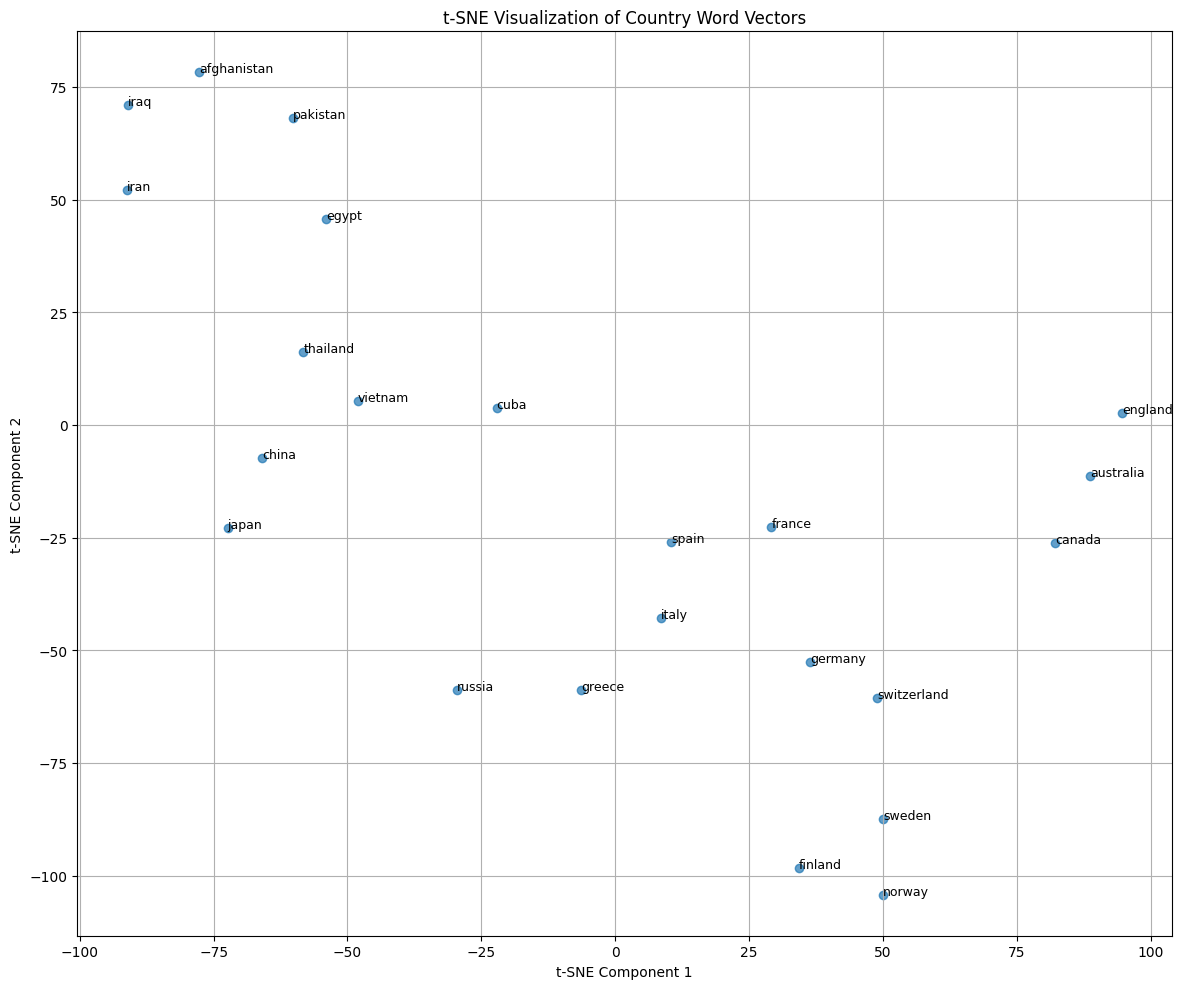

In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42, perplexity=5, learning_rate='auto', init='random', n_iter=2500, n_iter_without_progress=300)

tsne_country_vectors = tsne.fit_transform(country_vectors)

plt.figure(figsize=(12, 10))
plt.scatter(tsne_country_vectors[:, 0], tsne_country_vectors[:, 1], alpha=0.7)

for i, country in enumerate(valid_countries):
    plt.annotate(country, (tsne_country_vectors[i, 0], tsne_country_vectors[i, 1]), fontsize=9)

plt.title('t-SNE Visualization of Country Word Vectors')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)

plt.tight_layout()
plt.show()